In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train_BRCpofr.csv')
test  = pd.read_csv("test_koRSKBP.csv")
sub_df = pd.read_csv('sample_submission_9zqft7i/sample_submission.csv')

### Train & test datasets display

In [4]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [5]:
test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [6]:
sub_df

,id,cltv
0,89393,97952.828978
1,89394,97952.828978
2,89395,97952.828978
3,89396,97952.828978
4,89397,97952.828978
...,...,...
59590,148983,97952.828978
59591,148984,97952.828978
59592,148985,97952.828978
59593,148986,97952.828978


#### Null values detection & column dtype checking

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [8]:
[features for features in train.columns if train[features].isnull().sum()>0]   # Category containing missing values

[]

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [10]:
[features for features in test.columns if test[features].isnull().sum()>0]

[]

#### Dropping the ID column from both the datasets

In [11]:
train.drop(columns=['id'], axis=1, inplace=True)
test.drop(columns=['id'], axis=1, inplace=True)

In [12]:
sub_df.drop(columns=['cltv'], axis=1, inplace=True)
sub_df.head()

,id
0,89393
1,89394
2,89395
3,89396
4,89397


In [13]:
train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [14]:
test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


#### Checking unique values in categorical value columns in datasets

In [15]:
unk_gen = train['gender'].unique()
unk_area = train['area'].unique()
unk_qual = train['qualification'].unique()
unk_incm = train['income'].unique()
unk_no_pol = train['num_policies'].unique()
unk_pol = train['policy'].unique()
unk_typ_pol = train['type_of_policy'].unique()
print(f'{unk_gen=},\n {unk_area=},\n {unk_qual=},\n {unk_incm=},\n {unk_no_pol=},\n {unk_typ_pol=},\n {unk_pol=}')

unk_gen=array(['Male', 'Female'], dtype=object),
 unk_area=array(['Urban', 'Rural'], dtype=object),
 unk_qual=array(['Bachelor', 'High School', 'Others'], dtype=object),
 unk_incm=array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object),
 unk_no_pol=array(['More than 1', '1'], dtype=object),
 unk_typ_pol=array(['Platinum', 'Gold', 'Silver'], dtype=object),
 unk_pol=array(['A', 'C', 'B'], dtype=object)


In [16]:
unk_gen_test = test['gender'].unique()
unk_area_test = test['area'].unique()
unk_qual_test = test['qualification'].unique()
unk_incm_test = test['income'].unique()
unk_no_pol_test = test['num_policies'].unique()
unk_pol_test = test['policy'].unique()
unk_typ_pol_test = test['type_of_policy'].unique()
print(f'{unk_gen_test=},\n {unk_area_test=},\n {unk_qual_test=},\n {unk_incm_test=},\n {unk_no_pol_test=},\n {unk_typ_pol_test=},\n {unk_pol_test=}' )

unk_gen_test=array(['Female', 'Male'], dtype=object),
 unk_area_test=array(['Rural', 'Urban'], dtype=object),
 unk_qual_test=array(['High School', 'Bachelor', 'Others'], dtype=object),
 unk_incm_test=array(['5L-10L', '2L-5L', 'More than 10L', '<=2L'], dtype=object),
 unk_no_pol_test=array(['More than 1', '1'], dtype=object),
 unk_typ_pol_test=array(['Silver', 'Platinum', 'Gold'], dtype=object),
 unk_pol_test=array(['B', 'A', 'C'], dtype=object)


#### Label encoding categorical columns

In [17]:
train['gender'] = train['gender'].map({'Female':0,'Male':1})
train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,1,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,1,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,0,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,1,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [18]:
test['gender'] = test['gender'].map({'Female':0,'Male':1})
test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,0,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,0,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,1,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,0,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,0,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [19]:
train['qualification'] = train['qualification'].map({'High School':0,'Bachelor':1, 'Others':2})
test['qualification'] = test['qualification'].map({'High School':0,'Bachelor':1, 'Others':2})

In [20]:
train['area'] = train['area'].map({'Rural':0,'Urban':1})
test['area'] = test['area'].map({'Rural':0,'Urban':1})

In [21]:
train['income'] = train['income'].map({'<=2L':0,'2L-5L':1, '5L-10L':2, 'More than 10L':3})
test['income'] = test['income'].map({'<=2L':0,'2L-5L':1, '5L-10L':2, 'More than 10L':3})

In [22]:
train['num_policies'] = train['num_policies'].map({'More than 1':0,'1':1})
test['num_policies'] = test['num_policies'].map({'More than 1':0,'1':1})

In [23]:
train['policy'] = train['policy'].map({'A':0,'B':1, 'C':2})
test['policy'] = test['policy'].map({'A':0,'B':1, 'C':2})

In [24]:
train['type_of_policy'] = train['type_of_policy'].map({'Silver':0,'Gold':1, 'Platinum':2})
test['type_of_policy'] = test['type_of_policy'].map({'Silver':0,'Gold':1, 'Platinum':2})
train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,2,1,5,5790,0,0,2,64308
1,1,0,0,2,0,8,5080,0,0,2,515400
2,1,1,1,2,1,8,2599,0,0,2,64212
3,0,0,0,2,0,7,0,0,0,2,97920
4,1,1,0,3,1,6,3508,0,0,1,59736


In [25]:
test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,0,0,0,2,0,6,2134,0,1,0
1,0,1,0,1,0,4,4102,0,0,2
2,1,0,0,2,1,7,2925,0,1,1
3,0,0,1,3,1,2,0,0,1,0
4,0,1,0,1,0,5,14059,0,1,0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          89392 non-null  int64
 1   area            89392 non-null  int64
 2   qualification   89392 non-null  int64
 3   income          89392 non-null  int64
 4   marital_status  89392 non-null  int64
 5   vintage         89392 non-null  int64
 6   claim_amount    89392 non-null  int64
 7   num_policies    89392 non-null  int64
 8   policy          89392 non-null  int64
 9   type_of_policy  89392 non-null  int64
 10  cltv            89392 non-null  int64
dtypes: int64(11)
memory usage: 7.5 MB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          59595 non-null  int64
 1   area            59595 non-null  int64
 2   qualification   59595 non-null  int64
 3   income          59595 non-null  int64
 4   marital_status  59595 non-null  int64
 5   vintage         59595 non-null  int64
 6   claim_amount    59595 non-null  int64
 7   num_policies    59595 non-null  int64
 8   policy          59595 non-null  int64
 9   type_of_policy  59595 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [28]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [29]:
train_x = train.drop(['cltv'], axis=1)
train_y = train['cltv']

In [30]:
classifier = GradientBoostingRegressor()
classifier.fit(train_x, train_y)

GradientBoostingRegressor()

In [31]:
y_pred = classifier.predict(test)

In [32]:
pred = pd.DataFrame(y_pred)
datasets = pd.concat([sub_df['id'],pred], axis=1)

In [33]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      59595 non-null  int64  
 1   0       59595 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 931.3 KB


In [34]:
datasets.columns = ['id','cltv']
#datasets.to_csv('sample_submission_9zqft7i/submission_first_gb.csv',index=False)

In [ ]:
classifier2 = GradientBoostingRegressor(n_estimators=500)
classifier2.fit(train_x, train_y)
y_pred2 = classifier.predict(test)
pred2 = pd.DataFrame(y_pred2)
datasets2 = pd.concat([sub_df['id'],pred2], axis=1)
datasets2.columns = ['id','cltv']
#datasets2.to_csv('sample_submission_9zqft7i/submission_second_gb500.csv',index=False)

In [39]:
combi_df = pd.concat([train, test], axis=0)
combi_df

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,2,1,5,5790,0,0,2,64308.0
1,1,0,0,2,0,8,5080,0,0,2,515400.0
2,1,1,1,2,1,8,2599,0,0,2,64212.0
3,0,0,0,2,0,7,0,0,0,2,97920.0
4,1,1,0,3,1,6,3508,0,0,1,59736.0
...,...,...,...,...,...,...,...,...,...,...,...
59590,1,0,1,2,1,6,0,1,0,0,NaN
59591,1,1,0,2,0,6,0,1,2,1,NaN
59592,0,1,0,1,1,4,3323,0,1,2,NaN
59593,1,0,1,2,0,1,2886,0,0,0,NaN


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'qualification'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'marital_status'}>,
        <AxesSubplot:title={'center':'vintage'}>],
       [<AxesSubplot:title={'center':'claim_amount'}>,
        <AxesSubplot:title={'center':'num_policies'}>,
        <AxesSubplot:title={'center':'policy'}>],
       [<AxesSubplot:title={'center':'type_of_policy'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

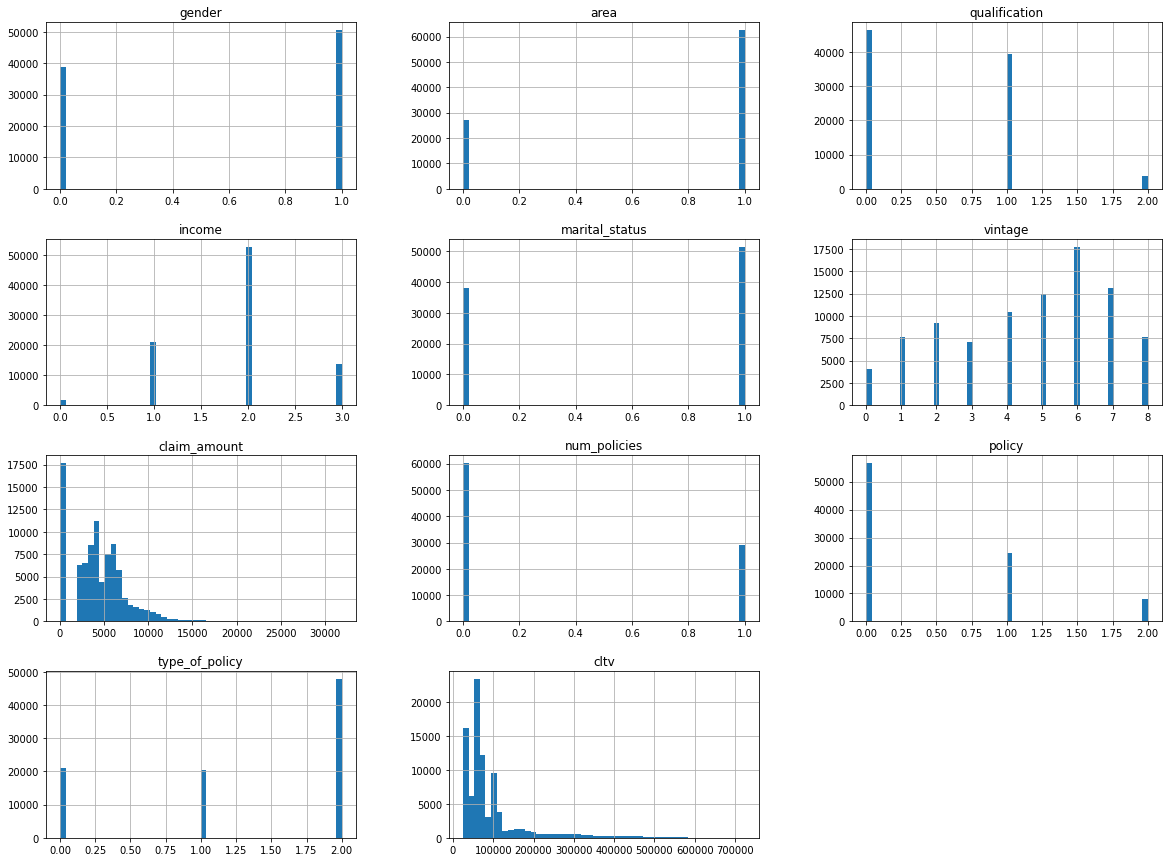

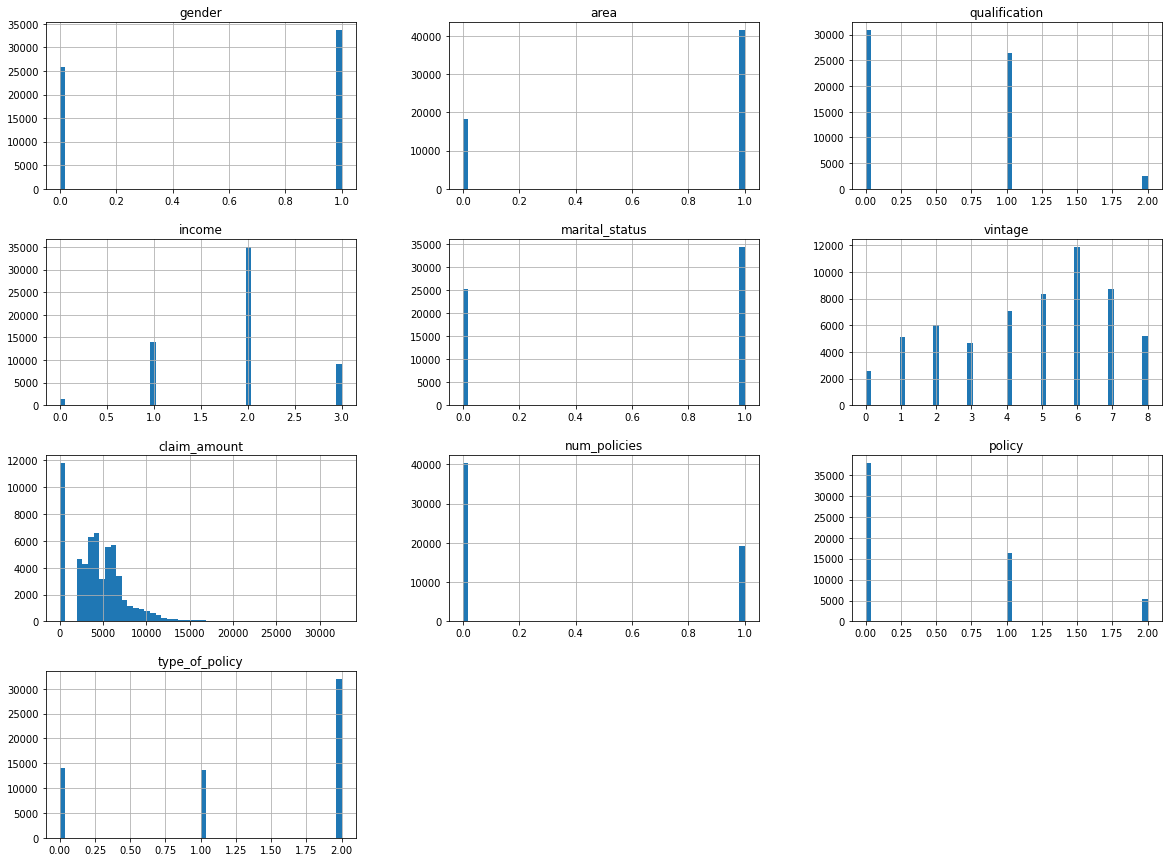

In [40]:
train.hist(bins=50, figsize=(20,15))
test.hist(bins=50, figsize=(20,15))

In [ ]:
x = combi_df[].drop(['cltv'], axis=1)
y = combi_df[]['cltv']